In [313]:
import pandas as pd
import numpy as np

## Format ratio

In [314]:
# #Load the dataset:
dfs = pd.read_csv('results/master/success_rate.csv', on_bad_lines='warn')



import csv


# with open('results/master/success_rate.csv', newline='', encoding='utf-8') as f:
#     reader = csv.reader(f)
#     rows = list(reader)
#     for row in rows:
#         print(row)




In [315]:
dfs['Success'].value_counts()

Success
True     216
False     99
Name: count, dtype: int64

In [331]:
success = dfs['Success'].value_counts()[True]
fail = dfs['Success'].value_counts()[False]
total = len(dfs)

print(f"Ratio success: {success}/{total}")
print(f"percent: {success/total*100}%")

Ratio success: 216/315
percent: 68.57142857142857%


Random print some of the False.


In [317]:
failed_rows = dfs[dfs['Success'] == False]
sample_dfs = failed_rows.sample(min(10, (max(1,int(total*0.2)))))
for _,row in sample_dfs.iterrows():
    print("------")
    print(row['Comment'])


------
"""
Test the functionality of the Flask flash messaging system.

This test suite covers various scenarios, including:

- Flashing messages with different categories
- Filtering flashed messages by category
- Retrieving flashed messages with and without categories

The tests ensure that the flash messaging system behaves as expected in different situations.
"""

def test_extended_flashing(app):
    # Be sure app.testing=True below, else tests can fail silently.
    #
    # Specifically, if app.testing is not set to True, the AssertionErrors
    # in the view functions will cause a 500 response to the test client
    # instead of propagating exceptions.
------
 '""""""\nInitializes a new Flask application instance.\n\nThis function is used to create a new Flask application. It takes several keyword arguments that define various aspects of the application. such as its import name. static folder path. and template folder path.\n\nThe `__init__` method initializes the Flask applicati

## Semantic Score

In [318]:
#Load the dataset:
df = pd.read_csv('results/master/semantic_score.csv')

In [319]:
df.shape

(210, 6)

In [320]:
df = df[~df.duplicated(subset=['Semantic-Score', 'Original-Comment', 'Agent-Comment'], keep='first')]
df.shape

(117, 6)

In [321]:
df.head()

,Semantic-Score,Code,Original-Comment,Agent-Comment,Filename,Agent-Commit
0,0.653213,def get_debug_flag,"""""""Get whether debug mode should be enabled fo...","""""""\nReturns a boolean indicating whether debu...",src/flask/helpers.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
1,0.593159,def dump,"""""""Serialize data as JSON and write to a file....","""""""\nDumps the provided object to a file strea...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
2,0.600225,def loads,"""""""Deserialize data as JSON.\n\n If :data:`...","""""""\nLoads JSON data from a string or bytes ob...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
3,0.691807,def load,"""""""Deserialize data as JSON read from a file.\...","""""""\nLoads JSON data from a file.\n\nThis func...",src/flask/json/__init__.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e
4,0.626986,def response,"""""""Serialize the given arguments as JSON, and ...","""""""\nReturns a response object with the prepar...",src/flask/json/provider.py,aa4ecf05d33c37d9cc04794f4332b34c94fd6d9e


<Axes: >

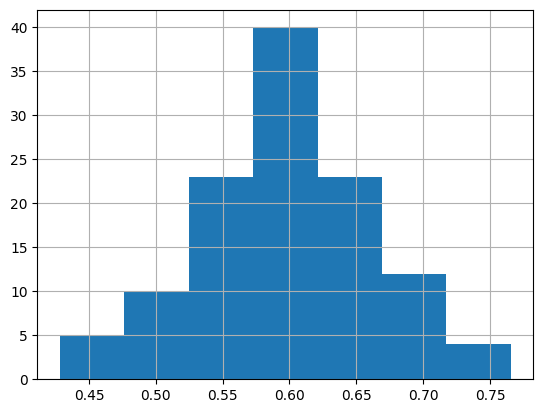

In [338]:
#Draw histogram to see distribution
df['Semantic-Score'].hist(bins=7)

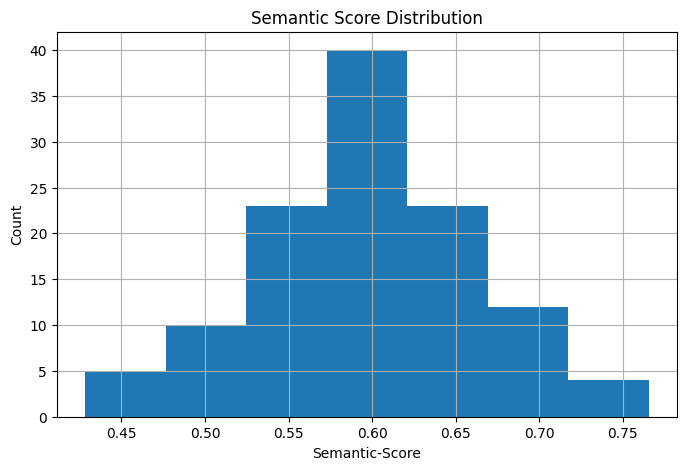

In [ ]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(8, 5))

# Plot histogram
df['Semantic-Score'].hist(bins=7)

# Add labels (optional but recommended)
plt.xlabel('Semantic-Score')
plt.ylabel('Count')
plt.title('Semantic Score Distribution')

# # Save as PNG
# plt.savefig('semantic_score_histogram.png', dpi=300, bbox_inches='tight')

# Optionally display
plt.show()

We can see that it follows normal distribution

In [336]:
df['Score-Bin'] = pd.cut(df['Semantic-Score'], bins=7)
# Sample from each bin
n = 0.3
sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(1, int(len(x) * n)), random_state=0))
sample_df = sample_df.reset_index(drop=True)
sample_df['Label'] = ''



/var/folders/m6/6rkrbj5n1y3gjb1b_ndclcl00000gn/T/ipykernel_85760/2389699327.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(1, int(len(x) * n)), random_state=0))
/var/folders/m6/6rkrbj5n1y3gjb1b_ndclcl00000gn/T/ipykernel_85760/2389699327.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('Score-Bin', group_keys=False).apply(lambda x: x.sample(n=max(1, int(len(x) * n)), random_state=0))


In [324]:
sample_df.shape

(33, 8)

Iterate, and give labels 'L', 'M' or 'H' before continuing 

In [325]:
sample_df[sample_df['Label'] == ''][['Semantic-Score','Original-Comment', 'Agent-Comment', 'Label']]

,Semantic-Score,Original-Comment,Agent-Comment,Label
0,0.475059,"""""""This is called at the end of each request, ...","""""""\nSaves a session.\n\nThis method is intend...",
1,0.506016,"""""""This is called at the end of each request, ...","""""""\nSaves a session cookie to the client's br...",
2,0.535671,"""""""The JSON encoder class to use. Defaults to\...","""""""\nReturns the JSON encoder class for this a...",
3,0.506016,"""""""This is called at the end of each request, ...","""""""\nSaves a session cookie to the client's br...",
4,0.492957,"""""""This is called at the beginning of each req...","""""""\nOpens a new session for the given Flask a...",
5,0.527224,"""""""This is called at the end of each request, ...","""""""\nSaves a session cookie to the client's br...",
6,0.530938,"""""""Read-only view of the ``MAX_CONTENT_LENGTH`...","""""""\nReturns the maximum allowed content lengt...",
7,0.592790,"""""""The default value for ``max_age`` for :func...","""""""\nDeprecation Notice:\n\nThe `send_file_max...",
8,0.557319,"""""""Updates the values in the config from a Pyt...","""""""\nLoads a configuration from a Python file....",
9,0.560126,"""""""Whether debug mode is enabled. When using `...","""""""\nReturns whether the debug mode is enabled...",


In [326]:
n = 1

print("""-- LABEL --""")
print(sample_df.iloc[n]["Label"])
print("""-- Original Comment --""")
print(sample_df.iloc[n]["Original-Comment"])
print("""-- Agent Comment --""")
print(sample_df.iloc[n]["Agent-Comment"])

-- LABEL --

-- Original Comment --
"""This is called at the end of each request, after generating
        a response, before removing the request context. It is skipped
        if :meth:`is_null_session` returns ``True``.
        """
-- Agent Comment --
"""
Saves a session cookie to the client's browser.

This method sets a session cookie based on the provided `app`, `session`, and `response` objects.
It determines the necessary cookie attributes (name, domain, path, secure, samesite, httponly) using
the `get_cookie_name`, `get_cookie_domain`, `get_cookie_path`, `get_cookie_secure`, 
`get_cookie_samesite`, and `get_cookie_httponly` methods.

If the session was accessed at all, a "Vary: Cookie" header is added to the response.
If the session is modified or empty, the cookie is removed or not set respectively.
Otherwise, if the session should be set as a cookie according to the `should_set_cookie` method,
the necessary attributes are determined and the cookie is set.

Parameters:
app (F

In [327]:
sample_df.iloc[7,7] = ""

NOW WE HAVE LABELED ALL THE SAMPLE

In [328]:
summary = sample_df.groupby('Label')['Semantic-Score'].agg(
    Mean='mean',
    Std_Dev='std',
    Min='min',
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75),
    Max='max'
).reset_index()
summary

,Label,Mean,Std_Dev,Min,Q1,Median,Q3,Max
0,,0.59569,0.061097,0.475059,0.557319,0.599835,0.627122,0.743081


In [345]:
## Get Q3 of L and Q1 of M
# l_q3 = summary.loc[summary['Label'] == 'L', 'Q3'].values[0]
# m_q1 = summary.loc[summary['Label'] == 'M', 'Q1'].values[0]
# threshold_L_M = (l_q3 + m_q1) / 2

# # Get Q3 of M and Q1 of H
# m_q3 = summary.loc[summary['Label'] == 'M', 'Q3'].values[0]
# h_q1 = summary.loc[summary['Label'] == 'H', 'Q1'].values[0]
# threshold_M_H = (m_q3 + h_q1) / 2

## Show results
# low_medium = round(threshold_L_M, 3)
# medium_high = round(threshold_M_H, 3)

low_medium = 0.45
medium_high = 0.65

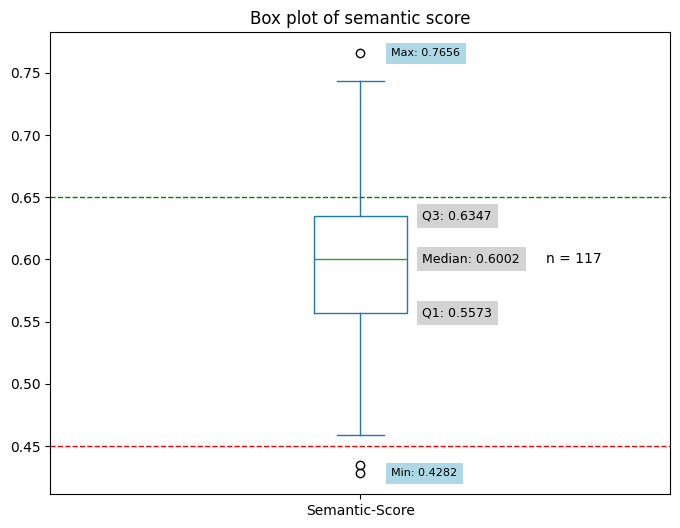

In [346]:
#Create boxplot
stats = df["Semantic-Score"].describe()
q1 = stats['25%']
median = stats['50%']
q3 = stats['75%']
min_val = stats['min']
max_val = stats['max']
count = df["Semantic-Score"].count()

plt.figure(figsize=(8, 6))
df["Semantic-Score"].plot.box()
plt.title("Box plot of semantic score")
plt.text(1.3, df['Semantic-Score'].median(), f'n = {count}', ha='left', va='center')
# Add annotations for Q1, Median, Q3
plt.text(1.1, q1, f'Q1: {q1:.4f}', va='center', ha='left', fontsize=9, bbox=dict(facecolor='lightgray', edgecolor='none'))
plt.text(1.1, median, f'Median: {median:.4f}', va='center', ha='left', fontsize=9, bbox=dict(facecolor='lightgray', edgecolor='none'))
plt.text(1.1, q3, f'Q3: {q3:.4f}', va='center', ha='left', fontsize=9, bbox=dict(facecolor='lightgray', edgecolor='none'))

# Add min/max as well if you like
plt.text(1.05, min_val, f'Min: {min_val:.4f}', va='center', ha='left', fontsize=8, bbox=dict(facecolor='lightblue', edgecolor='none'))
plt.text(1.05, max_val, f'Max: {max_val:.4f}', va='center', ha='left', fontsize=8, bbox=dict(facecolor='lightblue', edgecolor='none'))

plt.axhline(y=low_medium, color='red', linestyle='--', linewidth=1, label='Low-Medium Threshold')
plt.axhline(y=medium_high, color='green', linestyle='--', linewidth=1, label='Medium-High Threshold')

plt.show()
# plt.savefig("semantic_score_box_plot.png")